In [17]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox# for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
import numpy as np

In [2]:
df = gpd.read_file('dataframes/quartiers_sociologiques_2014.geojson') # arrondisement data

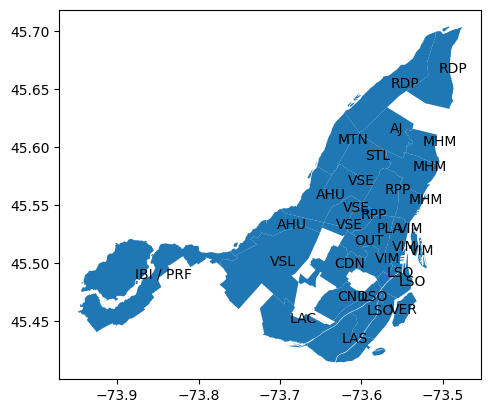

In [3]:
ax = df.plot()
for idx, row in df.iterrows():
    ax.annotate(text=row['Abreviation'], xy=(row.geometry.centroid.x, row.geometry.centroid.y), color='black')
plt.show()

In [4]:
city = 'Montreal, Canada'
drive_graph = ox.graph_from_place(city, network_type='drive')

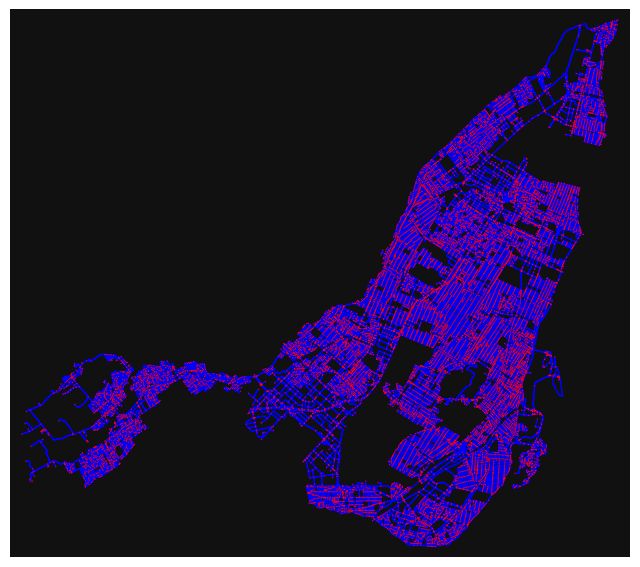

In [5]:
ox.plot_graph(drive_graph, node_color="r", edge_color='b', node_size=0.7);

In [6]:
pois = ox.geometries_from_place(
    city, tags={"amenity": True}
)

/var/folders/5y/mx06x73d0yb7mfb57y7lb2nh0000gn/T/ipykernel_38636/3808332410.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  pois = ox.geometries_from_place(


In [7]:
# retrieved from emma's pois_cleaning.ipynb
# remove any poi amenity types where there are less than 10 of that type
clean_pois = pois.groupby('amenity').filter(lambda x: len(x) >= 10)
# Initialize an empty list to hold the values for the new column
amenity_cat = []

# Iterate over each value in the 'amenity' column
for x in clean_pois['amenity']:
    # Check conditions and assign corresponding category to amenity_cat list
    if x == 'restaurant' or x == 'cafe' or x == 'fast_food':
        amenity_cat.append('eatery') # edit name of category
    else:
        amenity_cat.append('other') # leave as blank rather than other

# Assign the populated list to the new column 'amenity_cat'
clean_pois['amenity_cat'] = amenity_cat

In [15]:
clean_pois.to_csv('clean_pois', index=False)

In [12]:
clean_pois_nodes = clean_pois.loc['node'] # retreiving only POINTS and not POLYGONS

In [13]:
pharmacies = clean_pois_nodes[clean_pois_nodes['amenity'] == 'pharmacy']
pharmacies = ox.project_gdf(pharmacies)
pharmacies

,direction,geometry,amenity,name,created_by,addr:city,addr:housenumber,addr:postcode,addr:province,addr:street,...,flats,emergency:phone,abandoned,capacity:women,congregation,capacity:bus,ways,capacity:taxi,taxi,amenity_cat
osmid,,,,,,,,,,,,,,,,,,,,,
300491007,NaN,POINT (615615.041 5051256.138),pharmacy,Uniprix,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
305549398,NaN,POINT (607457.545 5039104.491),pharmacy,Jean Coutu,NaN,Montréal,5510,H3T 1Y9,Québec,Chemin de la Côte-des-Neiges,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
463988306,NaN,POINT (612613.856 5041349.586),pharmacy,Pharmaprix,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
497839720,NaN,POINT (610727.876 5042263.988),pharmacy,Jean Coutu,NaN,Montréal,501,H2J 1W6,QC,Avenue du Mont-Royal Est,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
665607743,NaN,POINT (607044.842 5044260.729),pharmacy,Jean Coutu,NaN,Montréal,531,H2P 1V4,QC,Rue Jarry Est,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11439809830,NaN,POINT (608497.801 5031100.978),pharmacy,Jean Coutu,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
11653413490,NaN,POINT (609485.711 5048100.755),pharmacy,Pharmaprix,NaN,NaN,4720,H1R 1X8,NaN,Rue Jarry Est,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other
11660363797,NaN,POINT (609509.539 5050629.086),pharmacy,Jean Coutu,NaN,NaN,8842,H1P 3C8,NaN,Boulevard Langelier,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other


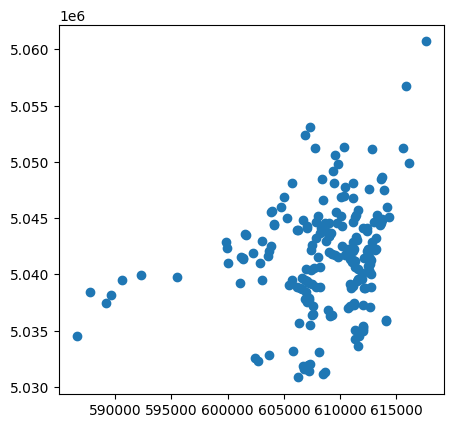

In [14]:
pharmacies.plot();

In [15]:
import numpy as np
pharmacies_coords = np.vstack((
    np.array(pharmacies.geometry.x),
    np.array(pharmacies.geometry.y)
)).T
pharmacies_coords

array([[ 615615.04078961, 5051256.13848779],
       [ 607457.54473553, 5039104.49118845],
       [ 612613.8559332 , 5041349.58628833],
       [ 610727.87642269, 5042263.98751194],
       [ 607044.84209134, 5044260.72911652],
       [ 609038.47791267, 5043452.64745327],
       [ 611202.0894831 , 5037434.35986852],
       [ 609596.21332164, 5045551.59115995],
       [ 607374.86985231, 5040346.75592716],
       [ 612533.43583324, 5047621.14481559],
       [ 610107.42132053, 5046882.09567878],
       [ 608329.54132628, 5044136.58511583],
       [ 611919.59272676, 5039554.35450161],
       [ 611564.3928331 , 5039571.4109125 ],
       [ 612015.1892875 , 5035383.04797287],
       [ 610851.86888427, 5037185.85723845],
       [ 612034.99897338, 5035184.32081897],
       [ 611668.12182401, 5034535.33110312],
       [ 611915.01877838, 5040092.01815393],
       [ 611588.82630616, 5040446.79697633],
       [ 611354.40217074, 5045136.37520773],
       [ 611005.44461041, 5038813.51728866],
       [ 6

In [20]:
G_proj = ox.project_graph(drive_graph)
# get the street network for a place, and its area in square meters - TODO: try to get per neighbourhood
city = ox.geocode_to_gdf('Montreal, Canada')
city_proj = ox.project_gdf(city)
area = city_proj.unary_union.area

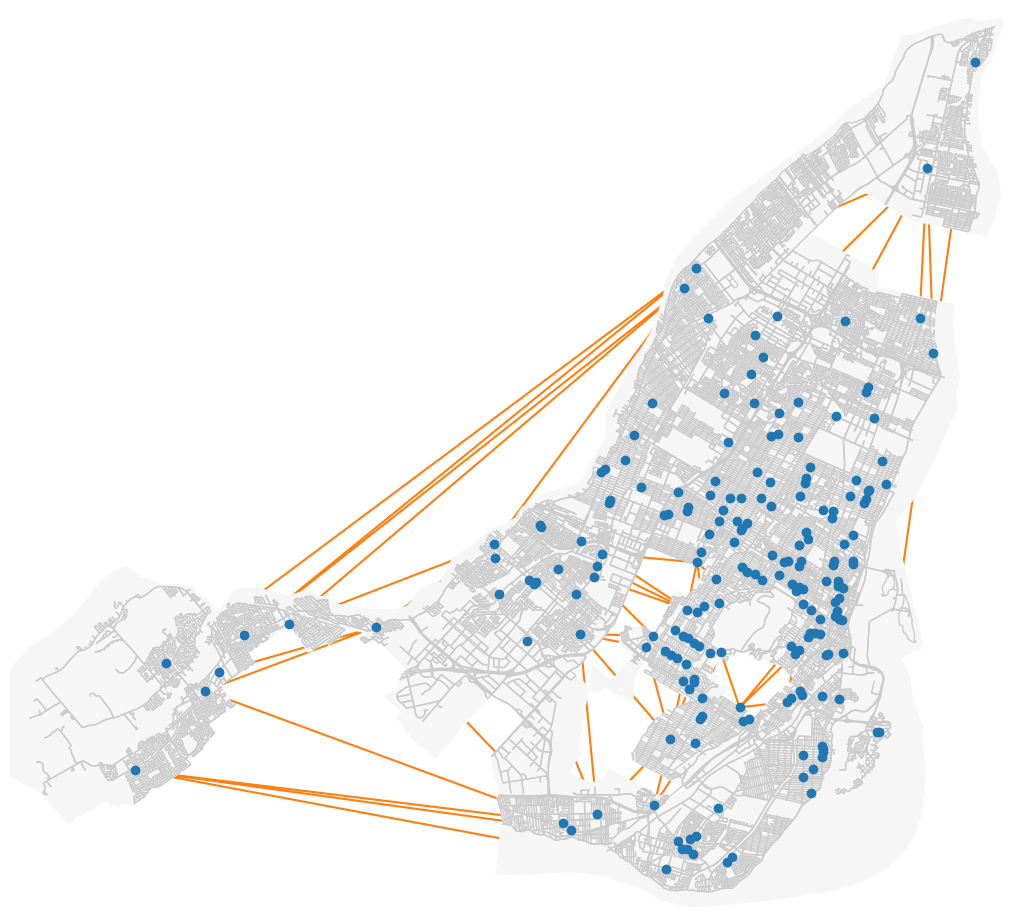

In [21]:
tri = Delaunay(pharmacies_coords)
fig = plt.figure(figsize=(12, 9))
axes = fig.add_axes([0, 0, 1, 1])
delaunay_plot_2d(tri, ax=axes);

# Plot city border
city_proj.plot(fc="#F6F6F6", ec="none", ax=axes);

# Plot street network
ox.plot_graph(G_proj, node_size=0, bgcolor="w", ax=axes, edge_color="#CCCCCC");